This is an assignment on how to analyze sales data.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/nicomauricio/Documents/IT/datasets/Analyzing_Sales_Data_Assignment/fct_invoice.csv')
df2 = pd.read_json('/Users/nicomauricio/Documents/IT/datasets/Analyzing_Sales_Data_Assignment/dim_customer.json')
df.head() # To get a quick idea of what the data looks like

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [73]:
# How many unique customers are in the dataset?
# Make use of nunique() function 
unique_customers = df['customer_id'].nunique()
print("Number of unique customers: ")
print(unique_customers)


Number of unique customers: 
5191


In [74]:
# What are the different categories of products available? 
# Make use of unique() & tolist() function - combine both
categories = df['category'].unique().tolist()
print("The different categories are: ")
print(categories)

The different categories are: 
['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']


In [75]:
#How many unique categories are there?
# Make use of nunique() function
categories = df['category'].nunique()
print("The number of unique categories are: ")
print(categories)

The number of unique categories are: 
8


In [76]:
# Which payment method is the most popular? How many times was it used?
# Make use of value_counts() function
payment_method = df['payment_method'].value_counts()
print("Below is a list of all payment methods alongside the number of items it was used: ")
print(payment_method)

Below is a list of all payment methods alongside the number of items it was used: 
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [77]:
# What are the three most popular categories, by total sales?
# Make use of df.groupby() function, parenthesis first followed by brackets
# Also make us of sum() & nlargest() function 
three_most_popular = df.groupby('category')['sales'].sum()
top_three = three_most_popular.nlargest(3)
print(top_three)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [78]:
import pandas as pd
df2.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [79]:
# What are the total sales attributed to customers over the age of 45?
# Make use of merge function
merged_df = pd.merge(df, df2, left_on='customer_id', right_on='id') # Why does the merged data look like this? 
merged_df = merged_df[merged_df['age'] > 45]
total_sales = (merged_df['quantity'] * merged_df['price']).sum() # Multiply the quantity of items bought by each person with the price
print("The total sales attributed to customers over the age of 45 is: ")
print(total_sales)


The total sales attributed to customers over the age of 45 is: 
82039768.15


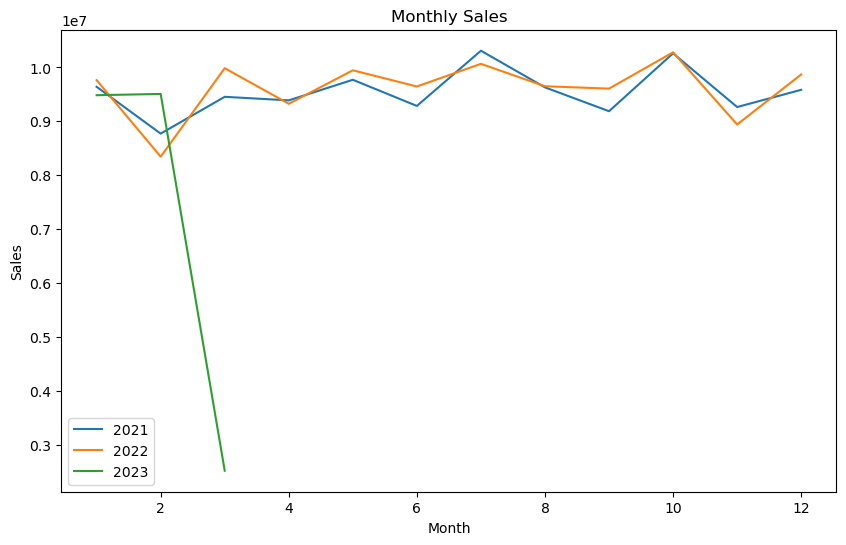

In [81]:
# How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? 
# Use a graph for this
merged_df = pd.merge(df, df2, left_on='customer_id', right_on='id')
merged_df['invoice_date'] = pd.to_datetime(merged_df['invoice_date'], format='%d/%m/%Y')
merged_df['year'] = merged_df['invoice_date'].dt.year
merged_df['month'] = merged_df['invoice_date'].dt.month
monthly_sales = merged_df.groupby(['year', 'month'])['sales'].sum()
monthly_sales = monthly_sales.unstack(level=0)
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(['2021', '2022', '2023'])

plt.show()


The graph shows that there are months throughout the year where the sales goes down, particularly in the months of February, August, and November. In contrast, there are other periods in data where there is an increase in sales during the months of March, June, July, September, and December. These changes could be caused by certain factors such as new trends in society or national holidays.

In [82]:
merged_df['decade'] = pd.cut(merged_df['age'], bins=range(10, 101, 10), right=False)
pivot_table = pd.pivot_table(merged_df, values='sales', index='decade', columns='category', aggfunc='sum')
print(pivot_table)

category      Books     Clothing  Cosmetics  Food & Beverage       Shoes  \
decade                                                                     
[10, 20)   12801.75   1927413.84  109619.36         13582.31   993281.35   
[20, 30)   79461.75  10250732.80  605915.32         73491.96  5924878.24   
[30, 40)   84143.10  11354126.96  723544.70         87246.86  7200839.66   
[40, 50)   87203.40  11215189.92  665034.96         89553.29  7025590.02   
[50, 60)   74962.20  10321851.76  587780.96         72425.04  5852857.84   
[60, 70)   80476.80  10660642.08  649990.76         80976.09  5978893.54   
[70, 80)   54827.85   7769371.28  419082.62         55050.98  4480269.05   
[80, 90)   26664.00   4493698.00  254531.60         31332.93  2628744.60   
[90, 100)      0.00         0.00       0.00             0.00        0.00   

category   Souvenir  Technology       Toys  
decade                                      
[10, 20)   12375.15   1129800.0   60426.24  
[20, 30)   54943.32   526155